In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("profiles.csv")

In [3]:
df.head(5)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
60547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop_duplicates(inplace=True)  
#dropping duplicates is a method to delete rows with all NaN values.

In [6]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df[:9514]
#we got to get rid of the last line too.

In [8]:
df.tail()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9509,28.0,athletic,strictly anything,socially,never,working on med school,just a normal guy looking for someone around m...,working hard and studying. things are always f...,"i'm excellent with oncology, numbers and algor...",my eyes change color.<br />\n<br />\ni smirk a...,"foo fighters, oasis, bloc party, doves, incubu...",my family and i all live here and i can't thin...,somewhere fun to go or something good to eat.,"studying, followed by shenanigans.","i've actually had some success on here, met so...",you've got something to say. or if there's som...,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,athletic,mostly anything,socially,sometimes,NaN,i work in the beauty salon as a hairstylist fo...,making your hair look beautiful.,i'm a hairstylist and love making hair look be...,i am different.,NaN,money<br />\ncell phone<br />\ncomputer<br />\...,how to be rich.,working and making your hair look beautiful an...,NaN,you like my profile and hair.,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,average,NaN,socially,NaN,dropped out of college/university,"33 year old, hiv +,versatile gwm, bearish type...",i've just recently moved to beautiful san fran...,"buying ""crap"" at random places and then sellin...",i usually go unnoticed.......,my favorite books - i don't read as much as i ...,-my record player<br />\n-my internet connecti...,nothing and everything all at once,probably working. then having drinks in the ca...,"i smoke marijuana, but nothing harder.","you're interested, duh!?!?",white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,athletic,anything,rarely,never,two-year college,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single
9513,49.0,overweight,NaN,rarely,never,graduated from college/university,NaN,NaN,NaN,NaN,"books: biographies, history, harry potter, mys...","the internet, art supplies, family, garden, my...",NaN,NaN,NaN,NaN,white,64.0,-1.0,rather not say,2012-06-14-15-14,"castro valley, california",NaN,straight,likes dogs and likes cats,NaN,f,pisces and it&rsquo;s fun to think about,no,english,single


In [9]:
df.shape

(9514, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9513
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          9514 non-null   float64
 1   body_type    8666 non-null   object 
 2   diet         5761 non-null   object 
 3   drinks       9012 non-null   object 
 4   drugs        7215 non-null   object 
 5   education    8459 non-null   object 
 6   essay0       8667 non-null   object 
 7   essay1       8347 non-null   object 
 8   essay2       8049 non-null   object 
 9   essay3       7690 non-null   object 
 10  essay4       7879 non-null   object 
 11  essay5       7814 non-null   object 
 12  essay6       7352 non-null   object 
 13  essay7       7553 non-null   object 
 14  essay8       6361 non-null   object 
 15  essay9       7554 non-null   object 
 16  ethnicity    8565 non-null   object 
 17  height       9514 non-null   float64
 18  income       9514 non-null   float64
 19  job   

In [11]:
df.isnull().sum()

age               0
body_type       848
diet           3753
drinks          502
drugs          2299
education      1055
essay0          847
essay1         1167
essay2         1465
essay3         1824
essay4         1635
essay5         1700
essay6         2162
essay7         1961
essay8         3153
essay9         1960
ethnicity       949
height            0
income            0
job            1331
last_online       0
location          0
offspring      5628
orientation       0
pets           3162
religion       3253
sex               0
sign           1738
smokes          918
speaks            6
status            0
dtype: int64

In [12]:
for i in df:
    if ("essay" in i):
        df.drop(i,axis=1,inplace=True)
#we're not going to use essayX columns on regression and classification.
#so drop it!

In [13]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,average,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [14]:
df.shape

(9514, 21)

In [15]:
bodyShape={"average":"fit","fit":"fit","athletic":"fit","thin":"fit",
           "curvy":"curvy","a little extra":"curvy","skinny":"fit",
           "full figured":"curvy","overweight":"bad","jacked":"bad",
           "used up":"bad","rather not say":"curvy"}

df['body_type'].replace(bodyShape,inplace=True)

In [16]:
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,fit,mostly other,often,sometimes,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,anything,socially,NaN,graduated from masters program,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,vegetarian,socially,NaN,working on college/university,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


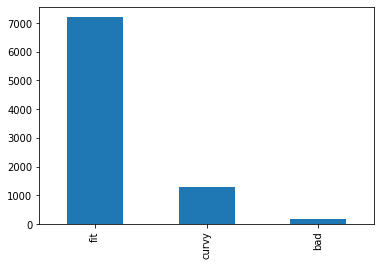

In [17]:
df['body_type'].value_counts().plot.bar();

In [18]:
status={"mostly":"","strictly":""}
df["diet"].replace(status,regex=True,inplace=True)

In [19]:
df["diet"][0]

' anything'

In [20]:
df["diet"]=df["diet"].str.strip()
#strip() method is used to remove spaces from both left and right side of the string.

In [21]:
df["diet"][0]

'anything'

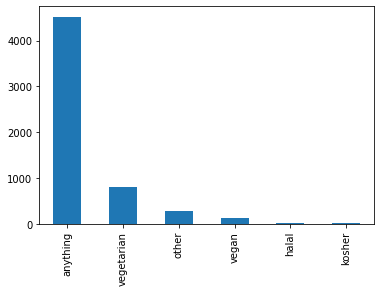

In [22]:
df["diet"].value_counts().plot.bar();

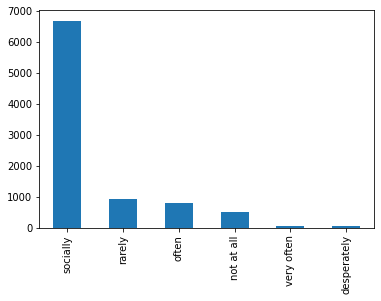

In [23]:
df.drinks.value_counts().plot.bar();

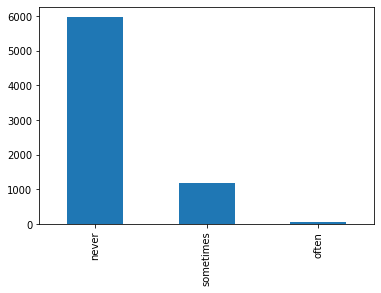

In [24]:
df.drugs.value_counts().plot.bar();

In [25]:
df["education"]=df["education"].replace({"working on":"student","graduated from":"graduated","dropped out":"dropped"},regex=True)

In [26]:
df["education"]=df["education"].str.split().str[0]

In [27]:
df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,anything,socially,never,student,"asian, white",75.0,-1.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.0,fit,other,often,sometimes,student,white,70.0,80000.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.0,fit,anything,socially,NaN,graduated,NaN,68.0,-1.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.0,fit,vegetarian,socially,NaN,student,white,71.0,20000.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.0,fit,NaN,socially,never,graduated,"asian, black, other",66.0,-1.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,anything,socially,never,student,white,73.0,60000.0,medicine / health,2012-06-30-02-49,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single
9510,31.0,fit,anything,socially,sometimes,NaN,white,72.0,-1.0,hospitality / travel,2012-04-05-21-46,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single
9511,34.0,fit,NaN,socially,NaN,dropped,white,71.0,-1.0,hospitality / travel,2012-04-28-12-42,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single
9512,29.0,fit,anything,rarely,never,two-year,white,70.0,-1.0,NaN,2012-03-01-15-17,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single


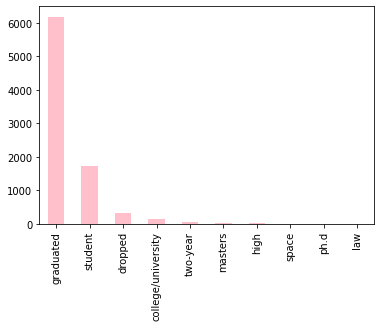

In [28]:
df.education.value_counts().plot.bar(color='pink');

In [29]:
df["education"]=df["education"].replace({"college/university":"student","two-year":"student","masters":"student"
                         ,"working":"student","space":"student","ph.d":"graduated","law":"graduated","high":"graduated"},regex=True)

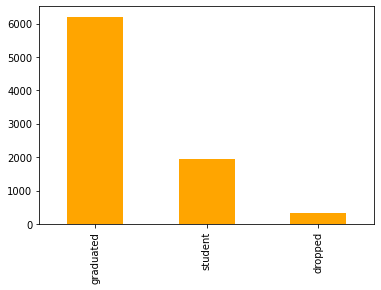

In [30]:
df.education.value_counts().plot.bar(color = 'orange');

In [31]:
df.drop(["ethnicity","job"],axis=1,inplace=True)

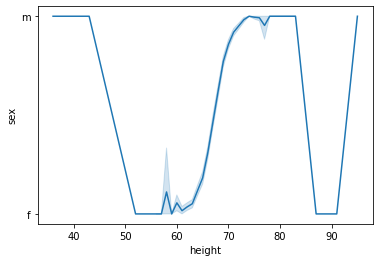

In [32]:
sns.lineplot(x="height",y="sex",data=df);

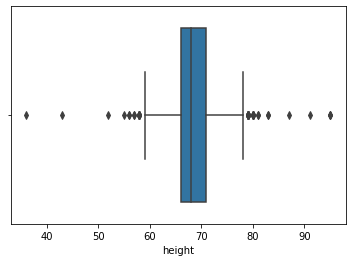

In [33]:
sns.boxplot("height",data=df);

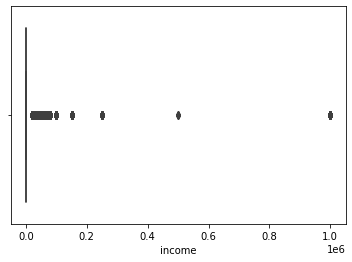

In [34]:
sns.boxplot("income",data=df);

In [35]:
df.head(1)

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [36]:
df["lastOnlineYear"]= 2021- df["last_online"].str[0:4].astype(int)
df["lastOnlineMonth"]=(df['last_online'].str[5:7]).astype(int)
df.drop('last_online',axis=1)

,age,body_type,diet,drinks,drugs,education,height,income,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,lastOnlineYear,lastOnlineMonth
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,9,6
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,9,6
2,38.0,fit,anything,socially,NaN,graduated,68.0,-1.0,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,9,6
3,23.0,fit,vegetarian,socially,NaN,student,71.0,20000.0,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,9,6
4,29.0,fit,NaN,socially,never,graduated,66.0,-1.0,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,anything,socially,never,student,73.0,60000.0,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,christianity,m,aries and it&rsquo;s fun to think about,no,"english, spanish (okay)",single,9,6
9510,31.0,fit,anything,socially,sometimes,NaN,72.0,-1.0,"san francisco, california",NaN,gay,NaN,atheism,m,scorpio but it doesn&rsquo;t matter,sometimes,english,single,9,4
9511,34.0,fit,NaN,socially,NaN,dropped,71.0,-1.0,"san francisco, california",doesn&rsquo;t want kids,gay,likes dogs and has cats,atheism and laughing about it,m,leo and it&rsquo;s fun to think about,when drinking,english (fluently),single,9,4
9512,29.0,fit,anything,rarely,never,student,70.0,-1.0,"san francisco, california","doesn&rsquo;t have kids, and doesn&rsquo;t wan...",gay,likes dogs and has cats,NaN,m,aries,no,"english (fluently), french (okay), swedish (po...",single,9,3


<AxesSubplot: xlabel='lastOnlineYear', ylabel='count'>

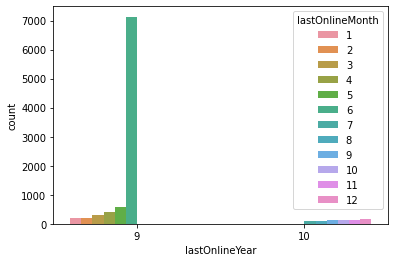

In [37]:
sns.countplot("lastOnlineYear",hue="lastOnlineMonth",data=df)

In [38]:
df.location=df.location.str.split(",").str[0]
plt.figure(figsize=(18,10))
df.education.value_counts().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x000001FFD1802D00>>

<Figure size 1296x720 with 0 Axes>

<AxesSubplot: >

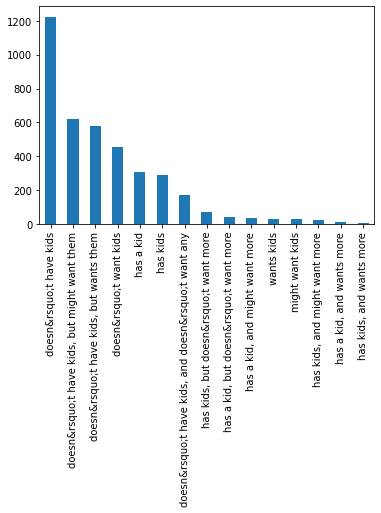

In [39]:
df.offspring.value_counts().plot.bar()

In [40]:
offsprings=[]
for i in df.offspring.fillna("unknown").str.replace("[^\w\s]",""):
    if "doesnrsquot" in i:
        offsprings.append("0")
    elif "unknown" in i:
        offsprings.append("0")
    else:
        offsprings.append("1")

In [41]:
df["offspring"]=offsprings
df["offspring"]=df["offspring"].astype(int)

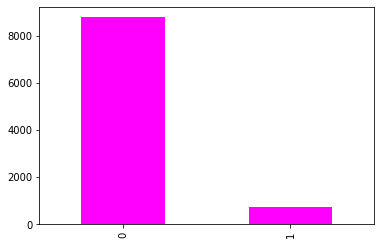

In [42]:
df["offspring"].value_counts().plot.bar(color='fuchsia');

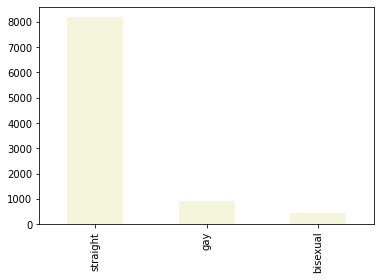

In [43]:
df.orientation.value_counts().plot.bar(color='beige');

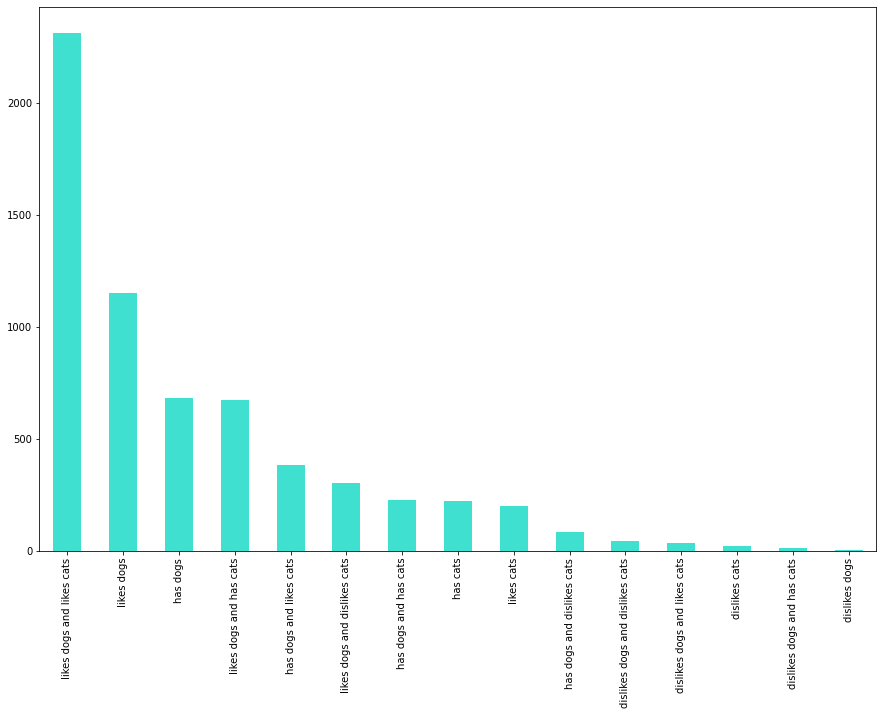

In [44]:
plt.figure(figsize=(15,10))
df.pets.value_counts().plot.bar(color='turquoise');

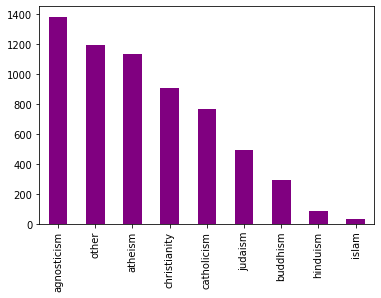

In [45]:
df.religion = df.religion.str.split(' ').str[0]
df.religion.value_counts().plot.bar(color='purple');

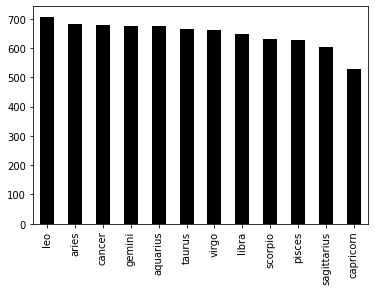

In [46]:
df.sign = df.sign.str.split(' ').str[0]
df.sign.value_counts().plot.bar(color='black');

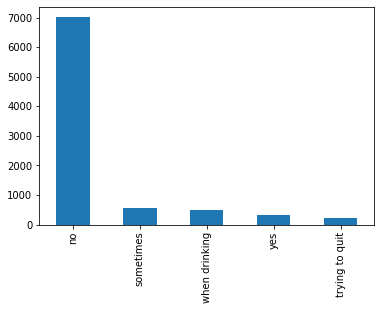

In [47]:
df.smokes.value_counts().plot.bar();

In [48]:
df["number_of_fluent_languages"]=df.speaks.str.count("fluently")

In [49]:
df["number_of_fluent_languages"]

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
9509    0.0
9510    0.0
9511    1.0
9512    1.0
9513    0.0
Name: number_of_fluent_languages, Length: 9514, dtype: float64

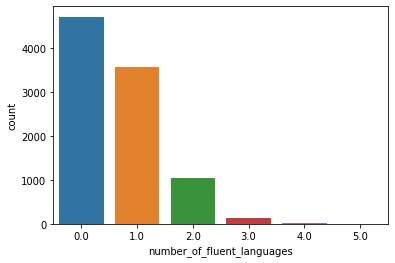

In [50]:
sns.countplot(df["number_of_fluent_languages"]);

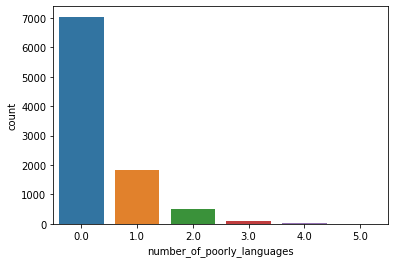

In [51]:
df["number_of_poorly_languages"]=df.speaks.str.count("poorly")
sns.countplot(df["number_of_poorly_languages"]);

In [52]:
df.drop("speaks",axis=1,inplace=True)

In [53]:
df

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,lastOnlineYear,lastOnlineMonth,number_of_fluent_languages,number_of_poorly_languages
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,south san francisco,0,straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,single,9,6,0.0,0.0
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,2012-06-29-21-41,oakland,0,straight,likes dogs and likes cats,agnosticism,m,cancer,no,single,9,6,1.0,2.0
2,38.0,fit,anything,socially,NaN,graduated,68.0,-1.0,2012-06-27-09-10,san francisco,0,straight,has cats,NaN,m,pisces,no,available,9,6,0.0,0.0
3,23.0,fit,vegetarian,socially,NaN,student,71.0,20000.0,2012-06-28-14-22,berkeley,0,straight,likes cats,NaN,m,pisces,no,single,9,6,0.0,1.0
4,29.0,fit,NaN,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,san francisco,0,straight,likes dogs and likes cats,NaN,m,aquarius,no,single,9,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,anything,socially,never,student,73.0,60000.0,2012-06-30-02-49,san francisco,0,straight,likes dogs and likes cats,christianity,m,aries,no,single,9,6,0.0,0.0
9510,31.0,fit,anything,socially,sometimes,NaN,72.0,-1.0,2012-04-05-21-46,san francisco,0,gay,NaN,atheism,m,scorpio,sometimes,single,9,4,0.0,0.0
9511,34.0,fit,NaN,socially,NaN,dropped,71.0,-1.0,2012-04-28-12-42,san francisco,0,gay,likes dogs and has cats,atheism,m,leo,when drinking,single,9,4,1.0,0.0
9512,29.0,fit,anything,rarely,never,student,70.0,-1.0,2012-03-01-15-17,san francisco,0,gay,likes dogs and has cats,NaN,m,aries,no,single,9,3,1.0,1.0


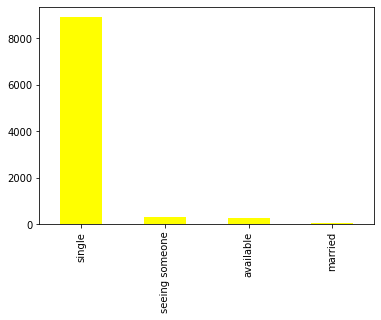

In [54]:
df.status.value_counts().plot.bar(color='yellow');

In [55]:
for column in df.select_dtypes(include=np.number):
    df[column].fillna(df[column].mean(),inplace=True)
#integer type NaN values filled with mean values.

In [56]:
for column in df.select_dtypes(include=np.object):
    df[column].fillna(df[column].mode()[0],inplace=True)
#object type NaN values filled with the most recurring values.

In [57]:
df.isnull().sum()

age                           0
body_type                     0
diet                          0
drinks                        0
drugs                         0
education                     0
height                        0
income                        0
last_online                   0
location                      0
offspring                     0
orientation                   0
pets                          0
religion                      0
sex                           0
sign                          0
smokes                        0
status                        0
lastOnlineYear                0
lastOnlineMonth               0
number_of_fluent_languages    0
number_of_poorly_languages    0
dtype: int64

In [59]:
generation=[]
for i in df["age"].values:
    if (i>=18) and (i<=32):
        generation.append("Millennial")
    elif (i>=33) and (i<=47):
        generation.append("Gen X-er")
    else:
        generation.append("Aged")
df["generation"]=generation

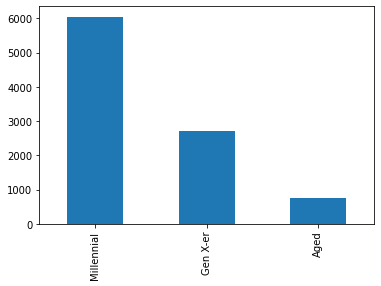

In [60]:
df["generation"].value_counts().plot.bar();

In [61]:
df

,age,body_type,diet,drinks,drugs,education,height,income,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,status,lastOnlineYear,lastOnlineMonth,number_of_fluent_languages,number_of_poorly_languages,generation
0,22.0,curvy,anything,socially,never,student,75.0,-1.0,2012-06-28-20-30,south san francisco,0,straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,single,9,6,0.0,0.0,Millennial
1,35.0,fit,other,often,sometimes,student,70.0,80000.0,2012-06-29-21-41,oakland,0,straight,likes dogs and likes cats,agnosticism,m,cancer,no,single,9,6,1.0,2.0,Gen X-er
2,38.0,fit,anything,socially,never,graduated,68.0,-1.0,2012-06-27-09-10,san francisco,0,straight,has cats,agnosticism,m,pisces,no,available,9,6,0.0,0.0,Gen X-er
3,23.0,fit,vegetarian,socially,never,student,71.0,20000.0,2012-06-28-14-22,berkeley,0,straight,likes cats,agnosticism,m,pisces,no,single,9,6,0.0,1.0,Millennial
4,29.0,fit,anything,socially,never,graduated,66.0,-1.0,2012-06-27-21-26,san francisco,0,straight,likes dogs and likes cats,agnosticism,m,aquarius,no,single,9,6,0.0,0.0,Millennial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9509,28.0,fit,anything,socially,never,student,73.0,60000.0,2012-06-30-02-49,san francisco,0,straight,likes dogs and likes cats,christianity,m,aries,no,single,9,6,0.0,0.0,Millennial
9510,31.0,fit,anything,socially,sometimes,graduated,72.0,-1.0,2012-04-05-21-46,san francisco,0,gay,likes dogs and likes cats,atheism,m,scorpio,sometimes,single,9,4,0.0,0.0,Millennial
9511,34.0,fit,anything,socially,never,dropped,71.0,-1.0,2012-04-28-12-42,san francisco,0,gay,likes dogs and has cats,atheism,m,leo,when drinking,single,9,4,1.0,0.0,Gen X-er
9512,29.0,fit,anything,rarely,never,student,70.0,-1.0,2012-03-01-15-17,san francisco,0,gay,likes dogs and has cats,agnosticism,m,aries,no,single,9,3,1.0,1.0,Millennial


In [62]:
df.corr()

,age,height,income,offspring,lastOnlineYear,lastOnlineMonth,number_of_fluent_languages,number_of_poorly_languages
age,1.000000,-0.022078,0.011424,0.341753,-0.015792,-0.003527,-0.044784,-0.001434
height,-0.022078,1.000000,0.073105,-0.033389,-0.016633,-0.010858,0.017101,0.036403
income,0.011424,0.073105,1.000000,0.015045,0.009376,0.002043,0.045224,0.028632
offspring,0.341753,-0.033389,0.015045,1.000000,0.029129,0.005697,-0.011364,-0.012192
lastOnlineYear,-0.015792,-0.016633,0.009376,0.029129,1.000000,0.685183,-0.016842,-0.034926
lastOnlineMonth,-0.003527,-0.010858,0.002043,0.005697,0.685183,1.000000,-0.008888,-0.006250
number_of_fluent_languages,-0.044784,0.017101,0.045224,-0.011364,-0.016842,-0.008888,1.000000,0.234979
number_of_poorly_languages,-0.001434,0.036403,0.028632,-0.012192,-0.034926,-0.006250,0.234979,1.000000


In [63]:
df.describe()

,age,height,income,offspring,lastOnlineYear,lastOnlineMonth,number_of_fluent_languages,number_of_poorly_languages
count,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000,9514.000000
mean,32.084192,68.337398,18887.145155,0.076624,9.077255,5.864936,0.650610,0.339188
std,9.445488,3.905229,91428.807808,0.266008,0.267009,1.627365,0.752677,0.645934
min,18.000000,36.000000,-1.000000,0.000000,9.000000,1.000000,0.000000,0.000000
25%,25.000000,66.000000,-1.000000,0.000000,9.000000,6.000000,0.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,0.000000
75%,36.000000,71.000000,-1.000000,0.000000,9.000000,6.000000,1.000000,1.000000
max,110.000000,95.000000,1000000.000000,1.000000,10.000000,12.000000,5.000000,5.000000


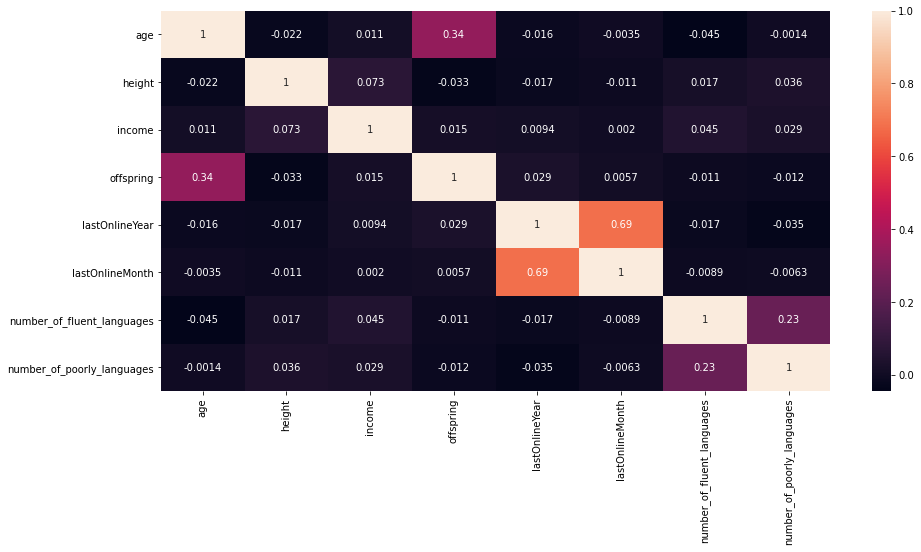

In [64]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True);

In [65]:
df2=pd.get_dummies(df,drop_first=True)

In [66]:
df2.shape

(9514, 6919)

## Can your date guess your age?

In [68]:
x,y=df2.drop("age",axis=1),df[["age"]]

In [69]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [70]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.853289,3.651546,2.974077
Ridge,0.837570,3.842192,3.093429
LinearRegression,0.804125,4.219254,3.361367
ExtraTreeRegressor,0.735866,4.899569,3.774566
Lasso,0.572190,6.235505,4.213471
KNeighborsRegressor,0.433516,7.175293,4.801576
ElasticNet,0.308607,7.926994,5.422564


## With Deep Learning

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [73]:
x=scaler.fit_transform(x)

In [74]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,6868,6869,6870,6871,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911,6912,6913,6914,6915,6916,6917
0,0.661017,0.000000,0.0,0.0,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.576271,0.080001,0.0,0.0,0.454545,0.2,0.4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.542373,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.593220,0.020001,0.0,0.0,0.454545,0.0,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.508475,0.000000,0.0,0.0,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [75]:
x.shape,y.shape

((9514, 6918), (9514, 1))

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [77]:
model=Sequential()
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [78]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=100, verbose=1)

Epoch 1/100
60/60 [==============================] - 7s 83ms/step - loss: 131.8203 - val_loss: 23.1023
Epoch 2/100
60/60 [==============================] - 5s 80ms/step - loss: 15.7077 - val_loss: 25.7774
Epoch 3/100
60/60 [==============================] - 5s 82ms/step - loss: 7.2358 - val_loss: 19.7831
Epoch 4/100
60/60 [==============================] - 5s 79ms/step - loss: 4.7280 - val_loss: 19.3643
Epoch 5/100
60/60 [==============================] - 5s 77ms/step - loss: 4.1888 - val_loss: 19.7845
Epoch 6/100
60/60 [==============================] - 5s 79ms/step - loss: 3.0463 - val_loss: 18.5307
Epoch 7/100
60/60 [==============================] - 5s 76ms/step - loss: 2.4387 - val_loss: 18.6597
Epoch 8/100
60/60 [==============================] - 4s 71ms/step - loss: 2.8033 - val_loss: 18.7415
Epoch 9/100
60/60 [==============================] - 4s 74ms/step - loss: 2.2822 - val_loss: 20.8071
Epoch 10/100
60/60 [==============================] - 5s 76ms/step - loss: 1.7818 - val_

60/60 [==============================] - 4s 73ms/step - loss: 0.2840 - val_loss: 17.6629
Epoch 82/100
60/60 [==============================] - 5s 76ms/step - loss: 0.3280 - val_loss: 17.4922
Epoch 83/100
60/60 [==============================] - 5s 79ms/step - loss: 0.4434 - val_loss: 17.2209
Epoch 84/100
60/60 [==============================] - 4s 74ms/step - loss: 0.5147 - val_loss: 17.3843
Epoch 85/100
60/60 [==============================] - 4s 73ms/step - loss: 0.5572 - val_loss: 17.0797
Epoch 86/100
60/60 [==============================] - 5s 77ms/step - loss: 0.6448 - val_loss: 17.5798
Epoch 87/100
60/60 [==============================] - 5s 77ms/step - loss: 0.5471 - val_loss: 17.6613
Epoch 88/100
60/60 [==============================] - 4s 73ms/step - loss: 0.4307 - val_loss: 18.9888
Epoch 89/100
60/60 [==============================] - 4s 75ms/step - loss: 1.1794 - val_loss: 18.7820
Epoch 90/100
60/60 [==============================] - 5s 79ms/step - loss: 1.6681 - val_loss: 1

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               5535200   
                                                                 
 dense_1 (Dense)             (None, 800)               640800    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 800)               640800    
                                                                 
 dense_4 (Dense)             (None, 800)               640800    
                                                                 
 dense_5 (Dense)             (None, 800)               640800    
                                                                 
 dense_6 (Dense)             (None, 1)                 8

In [80]:
pred=model.predict(x_test)

60/60 [==============================] - 1s 12ms/step


In [81]:
(mean_squared_error(y_test,pred))**.5

4.136775804718316

In [82]:
r2_score(y_test,pred) 

0.8117079593357042